In [191]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [192]:
df=pd.read_csv(r"https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [193]:
df.shape

(1599, 12)

In [194]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [195]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [196]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [197]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [199]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [200]:
# Dependent and Independent

In [201]:
X=df.drop(columns=["quality"])
y=df["quality"]

In [202]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [203]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [204]:
# Train Test Split

In [205]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=100)

In [206]:
scale=StandardScaler()

In [207]:
X_train=pd.DataFrame(scale.fit_transform(X_train),columns=X_train.columns)

In [208]:
scale.mean_

array([ 8.31851543,  0.53343203,  0.26984987,  2.5528357 ,  0.08867473,
       15.84904087, 46.43953294,  0.99675965,  3.3082402 ,  0.65784821,
       10.39446761])

In [209]:
scale.scale_

array([1.75137952e+00, 1.80655839e-01, 1.96033590e-01, 1.50271796e+00,
       4.82016817e-02, 1.04557998e+01, 3.25726092e+01, 1.89533690e-03,
       1.56962373e-01, 1.71775909e-01, 1.06487438e+00])

In [210]:
X_test=pd.DataFrame(scale.transform(X_test),columns=X_test.columns)

In [211]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.296061,0.922018,-1.070479,-0.434437,-0.200714,0.397001,-0.351201,-0.253068,0.584597,0.187173,0.474734
1,-0.238963,-1.901029,0.765941,-0.634075,-0.657129,0.205719,-0.504704,-1.456021,-0.116207,0.187173,0.756458
2,-0.924137,0.036356,-0.713398,-0.367891,-0.262952,-0.081203,-0.320500,0.285095,1.922498,-0.103904,-0.558251
3,-0.809942,1.696972,-0.305304,1.029577,-0.304444,0.014438,0.569818,0.876019,1.412821,0.361819,-1.090396
4,-0.524453,0.562218,-0.866433,-0.101706,-0.179967,0.014438,-0.412602,0.316751,1.731369,0.187173,0.380827
...,...,...,...,...,...,...,...,...,...,...,...
395,-0.924137,1.198788,-1.325537,-0.101706,-0.221460,0.110079,-0.443303,-0.664605,1.540240,-0.278550,2.258982
396,1.359776,-0.572536,0.612906,-0.234798,0.359433,-0.750688,-0.443303,0.970988,-2.664589,-0.918919,-0.746067
397,-0.524453,-0.185059,1.020999,-0.367891,-0.055490,0.492641,0.815423,0.126811,0.329759,-0.511412,-1.215606
398,0.560407,0.423833,-0.050246,0.563755,0.027494,0.875204,1.245232,1.577741,-0.434755,-0.220335,-0.652159


In [212]:
# Model Bulding

In [213]:
svc=SVC(C= 2, cache_size= 200, coef0= 0.0, gamma= 0.3, kernel= 'rbf', random_state= 33, shrinking= False, tol= 0.0001)

In [214]:
svc.fit(X_train,y_train)

SVC(C=2, gamma=0.3, random_state=33, shrinking=False, tol=0.0001)

In [215]:
svc.score(X_test,y_test)

0.6625

In [216]:
svc.score(X_train,y_train)

0.835696413678065

In [217]:
y_pred=svc.predict(X_test)

In [218]:
print(confusion_matrix(y_test,y_pred))
classification_report(y_test,y_pred)

[[  0   0   2   1   0   0]
 [  0   0   8   5   1   0]
 [  1   0 129  28   5   0]
 [  0   0  44 114  11   0]
 [  0   0   2  24  22   0]
 [  0   0   0   2   1   0]]


'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         3\n           4       0.00      0.00      0.00        14\n           5       0.70      0.79      0.74       163\n           6       0.66      0.67      0.66       169\n           7       0.55      0.46      0.50        48\n           8       0.00      0.00      0.00         3\n\n    accuracy                           0.66       400\n   macro avg       0.32      0.32      0.32       400\nweighted avg       0.63      0.66      0.64       400\n'

In [219]:
from collections import Counter
Counter(y_train)
Counter(y_test)

Counter({5: 163, 6: 169, 7: 48, 8: 3, 4: 14, 3: 3})

In [220]:

param={
    "C":[1,2,3],
    "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma":[0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    "coef0":[0.0,0.1,0.2],
    "shrinking":[False,True],
    "tol":[0.0001,0.001,0.002,0.003,0.004,0.005,0.006],
    "cache_size":[200,300,400,500],
    "random_state":[33,100,200,300]
}

In [221]:
# gscv=GridSearchCV(estimator=svc, param_grid=param)
# gscv.fit(X_train,y_train)

In [222]:
log_reg=LogisticRegression(solver="newton-cg")

In [223]:
log_reg.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [224]:
log_reg.score(X_test,y_test)

0.6125

In [225]:
path=dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha=path['ccp_alphas']
dt_model=[]
for ccp in ccp_alpha:
    dt_m=DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(X_train,y_train)
    dt_model.append(dt_m)
train_score=[i.score(X_train,y_train) for i in dt_model]
test_score=[i.score(X_test,y_test) for i in dt_model]

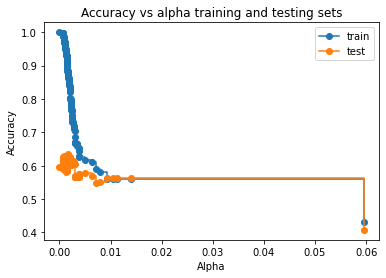

In [226]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",drawstyle="steps-post")
ax.legend()

In [227]:
dt=DecisionTreeClassifier(criterion='gini',ccp_alpha=0.001)

In [228]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001)

In [229]:
dt.score(X_test,y_test)

0.625